<a href="https://colab.research.google.com/github/ANUSHKALA/Twitter_Sentimental_Analysis/blob/main/Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Reference:***
https://joannatrojak.medium.com/sentiment-analysis-with-logistic-regression-in-python-with-nltk-library-d5030b1d84e3

In [144]:
import nltk
from os import getcwd
import numpy as np
import pandas as pd
from nltk.corpus import twitter_samples
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from nltk.tokenize import TweetTokenizer
import string
import seaborn as sns
# Import matplotlib, numpy and math
import matplotlib.pyplot as plt
import numpy as np
import math

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [145]:
def process_tweet(tweet):
  stemmer = PorterStemmer()
  stopwords_english = stopwords.words('english')
  tweet = re.sub(r'\$\w*', '', tweet)
  tweet = re.sub(r'^RT[\s]+', '', tweet)
  tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
  tweet = re.sub(r'#', '', tweet)
  tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)
  tweet_tokens = tokenizer.tokenize(tweet)

  tweets_clean = []
  for word in tweet_tokens:
      if (word not in stopwords_english and  
              word not in string.punctuation): 
          stem_word = stemmer.stem(word)  # stemming word
          tweets_clean.append(stem_word)

  return tweets_clean

In [146]:
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [147]:
import nltk
nltk.download('twitter_samples')
from nltk.stem import PorterStemmer
from nltk.corpus import twitter_samples

all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


In [148]:
# create frequency dictionary
freqs = build_freqs(train_x, train_y)
# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 11346


In [149]:
print('This is an example of a positive tweet: \n', train_x[0])
print('\nThis is an example of the processed version of the tweet: \n', process_tweet(train_x[0]))

This is an example of a positive tweet: 
 #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)

This is an example of the processed version of the tweet: 
 ['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']


In [150]:
def sigmoid(z):

    h = 1/(1+np.exp(-z))
    return h #function #and gradient descent 

In [151]:
def gradientDescent(x, y, theta, alpha, num_iters):
   
    m = x.shape[0]
    
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z = np.dot(x, theta)
        
        # get the sigmoid of z
        h = sigmoid(z)
        
        # calculate the cost function
        J = -1./m * (np.dot(y.transpose(), np.log(h)) + np.dot((1-y).transpose(),np.log(1-h)))
# update the weights theta
        theta = theta = theta = theta - (alpha/m) * np.dot(x.transpose(),(h-y))
        
    J = float(J)
    return J, theta

In [152]:
def extract_features(tweet, freqs):
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
    
    # loop through each word in the list of words
    for word in word_l:
        
        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word, 1.0), 0)
        
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.0), 0)
        
    assert(x.shape == (1, 3))
    return x

In [153]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)
# training labels corresponding to X
Y = train_y
# Apply gradient descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.24216529.
The resulting vector of weights is [7e-08, 0.0005239, -0.00055517]


In [154]:
def predict_tweet(tweet, freqs, theta):
    
    # extract the features of the tweet and store it into x
    x = extract_features(tweet, freqs)
    
    # make the prediction using x and theta
    y_pred = sigmoid(np.dot(x,theta))
    
    return y_pred

In [155]:
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs, theta)))

I am happy -> 0.518580
I am bad -> 0.494339
this movie should have been great. -> 0.515331
great -> 0.515464
great great -> 0.530898
great great great -> 0.546273
great great great great -> 0.561561


In [156]:
def test_logistic_regression(test_x, test_y, freqs, theta):
    
    # the list for storing predictions
    y_hat = []
    
    for tweet in test_x:
        # get the label prediction for the tweet
        y_pred = predict_tweet(tweet, freqs, theta)
        
        if y_pred > 0.5:
            # append 1.0 to the list
            y_hat.append(1)
        else:
            # append 0 to the list
            y_hat.append(0)
# With the above implementation, y_hat is a list, but test_y is (m,1) array
    # convert both to one-dimensional arrays in order to compare them using the '==' operator
    accuracy = (y_hat==np.squeeze(test_y)).sum()/len(test_x)   
    return accuracy

In [157]:
tmp_accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.4f}")

Logistic regression model's accuracy = 0.9950


In [158]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [159]:
test_data = pd.read_csv('/content/gdrive/MyDrive/data.csv')
df = pd.DataFrame(test_data)

In [160]:
p=[]
q=[]
for tweet in test_data['text']:
    a=(predict_tweet(tweet, freqs, theta))
    p.append(a)
    sig = np.round(a)
    q.append(sig) 

print(min(p))
print(max(p))

[[0.48127585]]
[[0.81523523]]


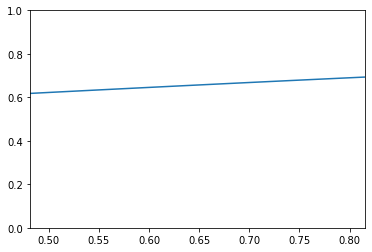

In [162]:
x = np.linspace(0.48127585, 0.81523523)
y = [sigmoid(value) for value in x]
figure, axe = plt.subplots()
axe.set_xlim([0.48127585,0.81523523])
axe.set_ylim([0, 1])
ax = axe.plot(x, y)
